# P5


## Récupération et visualisation des données

In [2]:
import pandas as pd
import numpy as np
import datetime
import pickle
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Récupération du fichier en local
CT_DIR_DATA = 'C:\Work\OpenClassrooms\data\P5/'
df = pd.read_excel(CT_DIR_DATA + 'Online Retail.xlsx')
print(df.shape)

(541909, 8)


In [5]:
print("Il y a %i client" % df.CustomerID.drop_duplicates().count())
df.head()

Il y a 4372 client


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Etude des valeurs manquantes

Etant donné qu'on veut travailler sur la segmentation des clients leur identification est indispensable, on supprime donc les id de clients non renseignés

In [9]:
df = df[pd.notnull(df['CustomerID'])]
print(df.shape)

(406829, 8)


## Les valeurs négatives

In [19]:
print(df[df.Quantity <= 0].shape)
df[df.Quantity <= 0].sort_values('InvoiceNo').head()

(8905, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


Il semble que cela corresponde à des annulations de commande, notons cette feature 'Cancel'

In [17]:
df[df['InvoiceNo'].str.startswith('C', na=False)==True].shape

(8905, 8)

In [10]:
df['Cancel'] = 0
df.loc[df.Quantity <= 0, 'Cancel'] = 1

In [11]:
df[df.UnitPrice<=0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647.0,Germany,0
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560.0,United Kingdom,0
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911.0,EIRE,0
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom,0
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom,0
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,2011-01-13 15:10:00,0.0,15107.0,United Kingdom,0
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2011-02-10 13:08:00,0.0,17560.0,United Kingdom,0
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,2011-03-23 10:25:00,0.0,13239.0,United Kingdom,0
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,2011-03-30 12:45:00,0.0,13113.0,United Kingdom,0
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,2011-04-04 14:42:00,0.0,14410.0,United Kingdom,0


Ici cela semble correspondre à des promotions, notons cette feature 'Promo'

In [12]:
df['Promo'] = 0
df.loc[df.UnitPrice <= 0, 'Promo'] = 1

In [13]:
#df = df[(df['Quantity']>0)]
#df = df[(df['UnitPrice']>0)]
df.shape

(406829, 10)

## Les pays

In [14]:
df.Country.describe()

count             406829
unique                37
top       United Kingdom
freq              361878
Name: Country, dtype: object

In [15]:
customer_country = df[['Country','CustomerID']].drop_duplicates()
customer_country.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID', ascending=False)

,Country,CustomerID
35,United Kingdom,3950
14,Germany,95
13,France,87
30,Spain,31
3,Belgium,25
32,Switzerland,21
26,Portugal,19
18,Italy,15
12,Finland,12
1,Austria,11


On peut catégoriser les achats hors du royaume uni par la feature 'UK'

In [16]:
df['UK'] = 1
df.loc[df.Country != 'United Kingdom', 'UK'] = 0

## Prix total

In [17]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel,Promo,UK,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0,0,1,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,0,1,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0,0,1,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,0,1,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,0,1,20.34


## Historique

In [ ]:
tmp = df.copy()
tmp['InvoiceDateY'] = tmp['InvoiceDate'].dt.year
tmp['InvoiceDateM'] = tmp['InvoiceDate'].dt.month
dfhisto = tmp.groupby(['CustomerID', 'InvoiceDateM', 'InvoiceDateY']).agg({
            'Quantity': lambda x: x.sum(),
            'TotalPrice': lambda x: x.sum()
      }).unstack().unstack()

# On enlève les colonnes dont toutes les valeurs sont nulles
dfhisto = dfhisto.dropna(axis=1, how='all')

# Le dernier mois n'étant pas complet on ne va pas l'utiliser pour définir notre modèle
#dfhisto = dfhisto.iloc[:, :-1]
dfhisto.drop(('TotalPrice', 2011, 12), axis = 1, inplace = True)
dfhisto.drop(('Quantity', 2011, 12), axis = 1, inplace = True)

# On ne garde pas non plus les features redondante avec la target
dfhisto.drop(('Quantity', 2011, 11), axis = 1, inplace = True)

print(dfhisto.shape)
dfhisto.head()
# On essayera donc de prédire les achats au mois de novembre 2011

In [ ]:
tmp = df.copy()
tmp['InvoiceDateY'] = tmp['InvoiceDate'].dt.year
tmp['InvoiceWeek'] = tmp['InvoiceDate'].dt.week
dfhistoweek = tmp.groupby(['CustomerID', 'InvoiceWeek', 'InvoiceDateY']).agg({
    'Quantity': lambda x: x.sum(),
    'TotalPrice': lambda x: x.sum()
                                                                            }).unstack().unstack()
# On enlève les colonnes dont toutes les valeurs sont nulles
dfhistoweek = dfhistoweek.dropna(axis=1, how='all')

# Ici la dernière semaine est complète on peut la garder

# Mais on ne garde pas les features correspondant à la target
dfhistoweek.drop(('Quantity', 2011, 49), axis = 1, inplace = True)

print(dfhistoweek.shape)
dfhistoweek.head()

## Historique mieux

In [ ]:
tmp = df.copy()
tmp['InvoiceDateYM'] = tmp.apply(lambda row: str(row['InvoiceDate'].year) + '-' + str(row['InvoiceDate'].month), axis=1)
dfhisto = tmp.groupby(['CustomerID', 'InvoiceDateYM']).agg({
            'Quantity': lambda x: x.sum(),
            'TotalPrice': lambda x: x.sum()
      }).unstack()

# Le dernier mois n'étant pas complet on ne va pas l'utiliser pour définir notre modèle
#dfhisto = dfhisto.iloc[:, :-1]
dfhisto.drop(('TotalPrice', '2011-12'), axis = 1, inplace = True)
dfhisto.drop(('Quantity', '2011-12'), axis = 1, inplace = True)

# On ne garde pas non plus les features redondante avec la target
dfhisto.drop(('Quantity', '2011-11'), axis = 1, inplace = True)

print(dfhisto.shape)
dfhisto.head()
# On essayera donc de prédire les achats au mois de novembre 2011

In [ ]:
tmp = df.copy()
tmp['InvoiceDateYW'] = tmp.apply(lambda row: str(row['InvoiceDate'].year) + '-' + str(row['InvoiceDate'].week), axis=1)
dfhistoweek = tmp.groupby(['CustomerID', 'InvoiceDateYW']).agg({
            'Quantity': lambda x: x.sum(),
            'TotalPrice': lambda x: x.sum()
      }).unstack()

# Ici la dernière semaine est complète on peut la garder

# Mais on ne garde pas les features correspondant à la target
dfhistoweek.drop(('Quantity', '2011-49'), axis = 1, inplace = True)

print(dfhistoweek.shape)
dfhistoweek.head()

# RFM Customer Segmentation

In [1]:
import datetime as dt
# Référence pour calculer la récence
NOW = dt.datetime(2011,12,10)
df.InvoiceDate.max()

NameError: name 'df' is not defined

In [20]:
#
rfmTable = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (NOW - x.max()).days, 
                                         'InvoiceNo': lambda x: len(x), 
                                         'TotalPrice': lambda x: x.sum(),
                                         'Cancel': lambda x: x.sum(),
                                         'Promo': lambda x: x.sum(),
                                         'UK': lambda x: 1 if (x.all()>0) else 0,
                                                        })
rfmTable['InvoiceDate'] = rfmTable['InvoiceDate'].astype(int)
rfmTable.rename(columns = {'InvoiceDate': 'recency', 
                         'InvoiceNo': 'frequency', 
                         'TotalPrice': 'monetary_value'}, inplace=True)
rfmTable.describe()

,recency,frequency,monetary_value,Cancel,Promo,UK
count,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000
mean,91.581199,93.053294,1898.459701,2.036825,0.009149,0.903477
std,100.772139,232.471608,8219.345141,7.340449,0.126218,0.295341
min,0.000000,1.000000,-4287.630000,0.000000,0.000000,0.000000
25%,16.000000,17.000000,293.362500,0.000000,0.000000,1.000000
50%,50.000000,42.000000,648.075000,0.000000,0.000000,1.000000
75%,143.000000,102.000000,1611.725000,1.000000,0.000000,1.000000
max,373.000000,7983.000000,279489.020000,226.000000,4.000000,1.000000


In [21]:
# Une monetary_value négative correspond certainement à des retours clients dont l'achat n'était pas dans la base, on le met à 0
rfmTable.loc[rfmTable.monetary_value < 0, 'monetary_value'] = 0
rfmTable.head()

,recency,frequency,monetary_value,Cancel,Promo,UK
CustomerID,,,,,,
12346.0,325,2,0.00,1,0,1
12347.0,2,182,4310.00,0,0,0
12348.0,75,31,1797.24,0,0,0
12349.0,18,73,1757.55,0,0,0
12350.0,310,17,334.40,0,0,0


In [22]:
df[df.CustomerID == 12348]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel,Promo,UK,TotalPrice
34083,539318,84992,72 SWEETHEART FAIRY CAKE CASES,72,2010-12-16 19:09:00,0.55,12348.0,Finland,0,0,0,39.60
34084,539318,22951,60 CAKE CASES DOLLY GIRL DESIGN,72,2010-12-16 19:09:00,0.55,12348.0,Finland,0,0,0,39.60
34085,539318,84991,60 TEATIME FAIRY CAKE CASES,24,2010-12-16 19:09:00,0.55,12348.0,Finland,0,0,0,13.20
34086,539318,84991,60 TEATIME FAIRY CAKE CASES,120,2010-12-16 19:09:00,0.42,12348.0,Finland,0,0,0,50.40
34087,539318,21213,PACK OF 72 SKULL CAKE CASES,24,2010-12-16 19:09:00,0.55,12348.0,Finland,0,0,0,13.20
34088,539318,21213,PACK OF 72 SKULL CAKE CASES,120,2010-12-16 19:09:00,0.42,12348.0,Finland,0,0,0,50.40
34089,539318,22616,PACK OF 12 LONDON TISSUES,72,2010-12-16 19:09:00,0.29,12348.0,Finland,0,0,0,20.88
34090,539318,21981,PACK OF 12 WOODLAND TISSUES,144,2010-12-16 19:09:00,0.29,12348.0,Finland,0,0,0,41.76
34091,539318,21982,PACK OF 12 SUKI TISSUES,144,2010-12-16 19:09:00,0.29,12348.0,Finland,0,0,0,41.76
34092,539318,21725,SWEETIES STICKERS,48,2010-12-16 19:09:00,0.85,12348.0,Finland,0,0,0,40.80


In [23]:
quantiles = rfmTable.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [24]:
# Recherche des plus gros apporteurs de chiffre
rfmTable = rfmTable.sort_values('monetary_value', ascending=False)
rfmTable['cum_sum'] = rfmTable.monetary_value.cumsum()
rfmTable['cum_perc'] = 100 * rfmTable.cum_sum / rfmTable.monetary_value.sum()
print(rfmTable[rfmTable['cum_perc']<60].shape)
#rfmTable[rfmTable['cum_perc']<60]

# 60% du CA par 10% des clients (à peu près 400)
nb_best_customers = rfmTable[rfmTable['cum_perc']<60].shape[0]

(439, 8)


Text(1000,50,'10% des clients, 60% du CA')

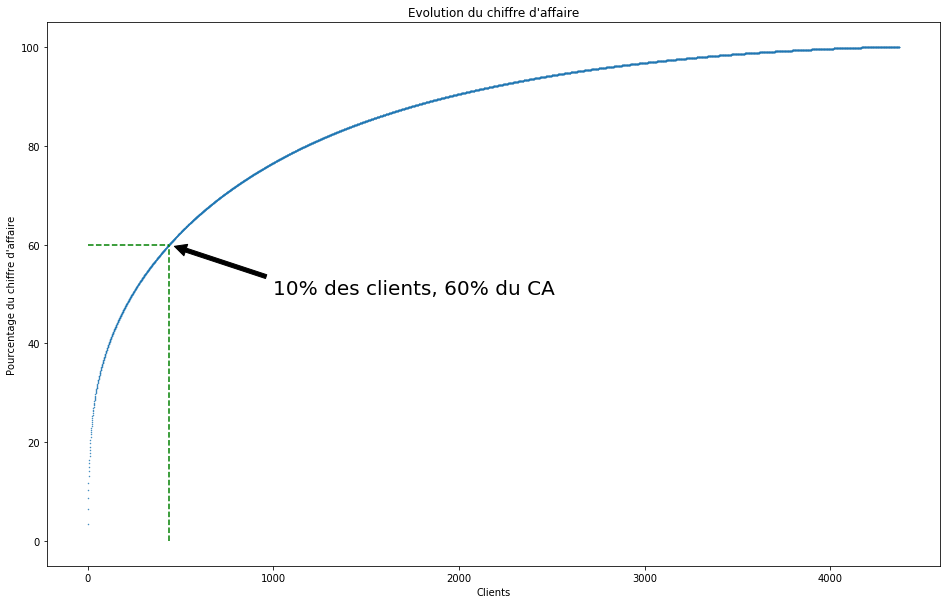

In [27]:
fig, ax = plt.subplots(figsize=(16,10))
plt.scatter(range(0, len(rfmTable['cum_sum'])), rfmTable['cum_perc'], s=0.2)
plt.plot((0, nb_best_customers), (60, 60), '--', c='g')
plt.plot((nb_best_customers, nb_best_customers), (0, 60), '--', c='g')
plt.xlabel("Clients")
plt.ylabel("Pourcentage du chiffre d'affaire")
plt.title("Evolution du chiffre d'affaire")
plt.annotate('10% des clients, 60% du CA', xy=(nb_best_customers, 60), xytext=(1000, 50), fontsize=20,
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

In [26]:
rfmTable['Best'] = 0
rfmTable.loc[rfmTable.cum_perc <= 60, 'Best'] = 1

In [27]:
segmented_rfm = rfmTable

In [28]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [29]:
segmented_rfm['r_quartile'] = segmented_rfm['recency'].apply(RScore, args=('recency',quantiles))
segmented_rfm['f_quartile'] = segmented_rfm['frequency'].apply(FMScore, args=('frequency',quantiles))
segmented_rfm['m_quartile'] = segmented_rfm['monetary_value'].apply(FMScore, args=('monetary_value',quantiles))

In [30]:
segmented_rfm.head()

,recency,frequency,monetary_value,Cancel,Promo,UK,cum_sum,cum_perc,Best,r_quartile,f_quartile,m_quartile
CustomerID,,,,,,,,,,,,
14646.0,1,2085,279489.02,5,4,0,279489.02,3.361952,1,1,1,1
18102.0,0,433,256438.49,2,0,1,535927.51,6.446632,1,1,1,1
17450.0,8,351,187482.17,14,0,1,723409.68,8.701841,1,1,1,1
14911.0,1,5903,132572.62,226,2,0,855982.30,10.296547,1,1,1,1
12415.0,24,778,123725.45,62,2,0,979707.75,11.784831,1,2,1,1


In [31]:
segmented_rfm['RFMScore'] = segmented_rfm.r_quartile.map(str) + segmented_rfm.f_quartile.map(str) + segmented_rfm.m_quartile.map(str)
segmented_rfm.head()

,recency,frequency,monetary_value,Cancel,Promo,UK,cum_sum,cum_perc,Best,r_quartile,f_quartile,m_quartile,RFMScore
CustomerID,,,,,,,,,,,,,
14646.0,1,2085,279489.02,5,4,0,279489.02,3.361952,1,1,1,1,111
18102.0,0,433,256438.49,2,0,1,535927.51,6.446632,1,1,1,1,111
17450.0,8,351,187482.17,14,0,1,723409.68,8.701841,1,1,1,1,111
14911.0,1,5903,132572.62,226,2,0,855982.30,10.296547,1,1,1,1,111
12415.0,24,778,123725.45,62,2,0,979707.75,11.784831,1,2,1,1,211


In [32]:
# 10 meilleurs clients
segmented_rfm[segmented_rfm['RFMScore']=='111'].sort_values('monetary_value', ascending=False).head(10)

,recency,frequency,monetary_value,Cancel,Promo,UK,cum_sum,cum_perc,Best,r_quartile,f_quartile,m_quartile,RFMScore
CustomerID,,,,,,,,,,,,,
14646.0,1,2085,279489.02,5,4,0,279489.02,3.361952,1,1,1,1,111
18102.0,0,433,256438.49,2,0,1,535927.51,6.446632,1,1,1,1,111
17450.0,8,351,187482.17,14,0,1,723409.68,8.701841,1,1,1,1,111
14911.0,1,5903,132572.62,226,2,0,855982.30,10.296547,1,1,1,1,111
14156.0,9,1420,113384.14,20,0,0,1093091.89,13.148720,1,1,1,1,111
17511.0,2,1076,88125.38,113,0,1,1181217.27,14.208774,1,1,1,1,111
16684.0,4,281,65892.08,4,0,1,1247109.35,15.001385,1,1,1,1,111
13694.0,3,585,62653.10,17,0,1,1309762.45,15.755034,1,1,1,1,111
15311.0,0,2491,59419.34,112,0,1,1369181.79,16.469785,1,1,1,1,111


In [33]:
segmented_rfm.RFMScore.describe()

count     4372
unique      62
top        111
freq       458
Name: RFMScore, dtype: object

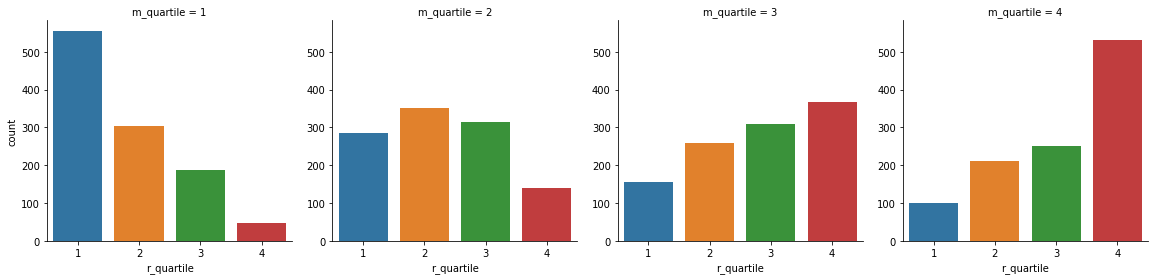

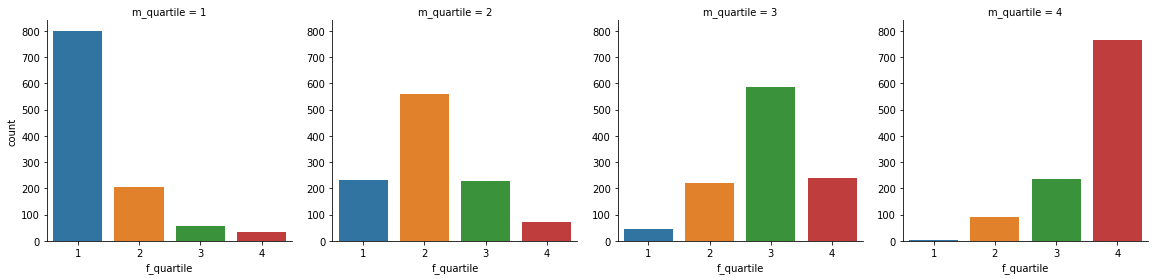

In [34]:
import seaborn as sns
cols = ['recency', 'frequency', 'monetary_value', 'm_quartile']
#sns.pairplot(segmented_rfm[cols], hue='m_quartile', size=2.5);
sns.factorplot(x='r_quartile', col='m_quartile', kind='count', data=segmented_rfm)
sns.factorplot(x='f_quartile', col='m_quartile', kind='count', data=segmented_rfm)

(array([ 1928.,   792.,   360.,   242.,   225.,   191.,   185.,   166.,
          144.,   139.]),
 array([   0. ,   37.3,   74.6,  111.9,  149.2,  186.5,  223.8,  261.1,
         298.4,  335.7,  373. ]),
 <a list of 1 Patch objects>)

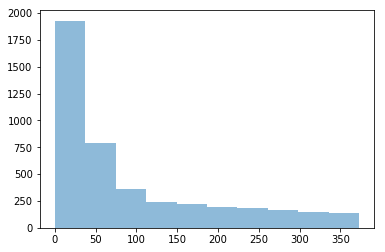

In [35]:
plt.hist(segmented_rfm.recency, bins=10, alpha=0.5, histtype='stepfilled')

Text(0.5,0,'Valeur')

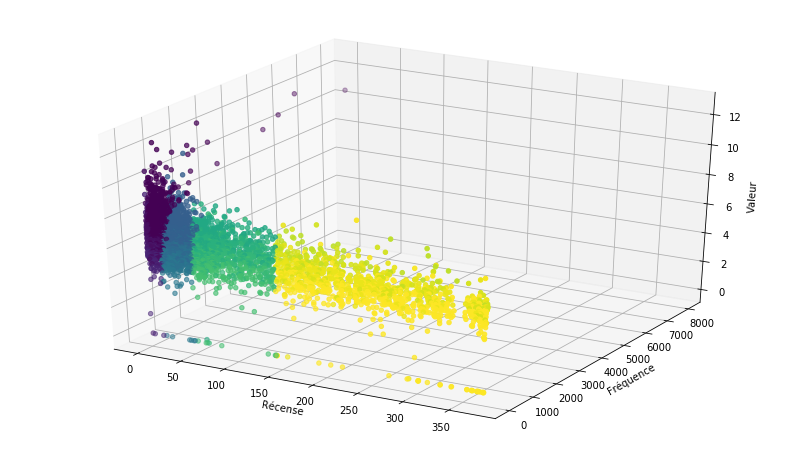

In [36]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(14, 8))
ax = plt.axes(projection='3d')
ax.scatter(segmented_rfm.recency, segmented_rfm.frequency, np.log(segmented_rfm.monetary_value+1), c=segmented_rfm.RFMScore)
#ax.scatter(segmented_rfm.frequency, segmented_rfm.recency, segmented_rfm.monetary_value, c=segmented_rfm.RFMScore)
plt.ylabel('Fréquence')
plt.xlabel('Récense')
ax.set_zlabel('Valeur')
#plt.gca().invert_xaxis()
#plt.gca().invert_yaxis()


## Exploration

In [90]:
from sklearn import preprocessing, decomposition, metrics, cluster
def PrepareDF(p_df, p_num, p_cat='', p_scale_all=False):
    if len(p_num) == 0:
        return pd.get_dummies(p_df[p_cat].astype(np.str))

    # Features numériques
    #scalingDF = preprocessing.scale(p_df[p_num])
    scalingDF = p_df[p_num]

    if len(p_cat) > 0:
        # Binarisation
        categDF = pd.get_dummies(p_df[p_cat].astype(np.str))
        X = pd.concat([scalingDF, categDF], axis=1)
    else:
        X = scalingDF
    print(X.columns)

    # Seules les xnum premières colonnes sont numériques
    xnum = scalingDF.shape[1]
    if p_scale_all:
        # Scaling de tout
        xnum = X.shape[1]
    x_numerical = X.iloc[:, 0:xnum]
    
    # Création d'un scaler pour les valeurs numériques 
    #scaler = preprocessing.StandardScaler()
    scaler = preprocessing.MinMaxScaler()

    # Qu'on entraine avec le training set
    scaler.fit(x_numerical) 
    x_numerical = scaler.transform(x_numerical)
    X = X.copy()
    X.loc[:, 0:xnum] = x_numerical
    return X
    
def GraphPCA(p_df):
    # 2 directions principales pour l'affichage
    pca = decomposition.PCA(n_components=2)
    pca.fit(p_df)
    print("Explained variance ratio :", pca.explained_variance_ratio_.cumsum())
    X_trans = pca.transform(p_df)
    
    fig = plt.figure(figsize=(16, 20))
    clstab = []
    for i in range(1, 11):
        # Avec i clusters
        cls = cluster.KMeans(n_clusters=i+1)
        cls.fit(p_df)
        ax = fig.add_subplot(4, 3, i)
        ax.scatter(X_trans[:, 0], X_trans[:, 1], c=cls.labels_)
        plt.title(str(i+1) + "clusters")
        clstab.append(cls)
    return clstab

Index(['Cancel', 'Promo', 'UK', 'Best', 'RFMScore_111', 'RFMScore_112',
       'RFMScore_113', 'RFMScore_114', 'RFMScore_121', 'RFMScore_122',
       'RFMScore_123', 'RFMScore_124', 'RFMScore_131', 'RFMScore_132',
       'RFMScore_133', 'RFMScore_134', 'RFMScore_141', 'RFMScore_142',
       'RFMScore_143', 'RFMScore_144', 'RFMScore_211', 'RFMScore_212',
       'RFMScore_213', 'RFMScore_221', 'RFMScore_222', 'RFMScore_223',
       'RFMScore_224', 'RFMScore_231', 'RFMScore_232', 'RFMScore_233',
       'RFMScore_234', 'RFMScore_241', 'RFMScore_242', 'RFMScore_243',
       'RFMScore_244', 'RFMScore_311', 'RFMScore_312', 'RFMScore_313',
       'RFMScore_314', 'RFMScore_321', 'RFMScore_322', 'RFMScore_323',
       'RFMScore_324', 'RFMScore_331', 'RFMScore_332', 'RFMScore_333',
       'RFMScore_334', 'RFMScore_341', 'RFMScore_342', 'RFMScore_343',
       'RFMScore_344', 'RFMScore_411', 'RFMScore_412', 'RFMScore_413',
       'RFMScore_421', 'RFMScore_422', 'RFMScore_423', 'RFMScore_424',
     

[KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max

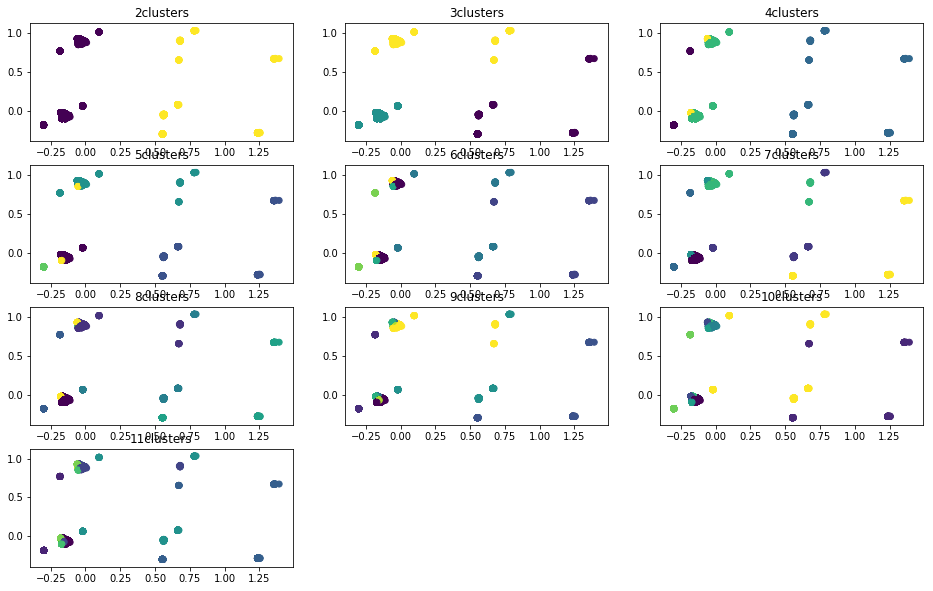

In [102]:
cols = ['recency', 'frequency', 'monetary_value']
cols = ['Cancel', 'Promo']
cols = []
cols = ['Cancel', 'Promo', 'UK', 'Best']

categories = ['RFMScore']
#categories = []

dfscaled = PrepareDF(segmented_rfm, cols, categories, False)
GraphPCA(dfscaled)

Index(['Cancel', 'Promo', 'UK', 'Best', 'RFMScore_111', 'RFMScore_112',
       'RFMScore_113', 'RFMScore_114', 'RFMScore_121', 'RFMScore_122',
       'RFMScore_123', 'RFMScore_124', 'RFMScore_131', 'RFMScore_132',
       'RFMScore_133', 'RFMScore_134', 'RFMScore_141', 'RFMScore_142',
       'RFMScore_143', 'RFMScore_144', 'RFMScore_211', 'RFMScore_212',
       'RFMScore_213', 'RFMScore_221', 'RFMScore_222', 'RFMScore_223',
       'RFMScore_224', 'RFMScore_231', 'RFMScore_232', 'RFMScore_233',
       'RFMScore_234', 'RFMScore_241', 'RFMScore_242', 'RFMScore_243',
       'RFMScore_244', 'RFMScore_311', 'RFMScore_312', 'RFMScore_313',
       'RFMScore_314', 'RFMScore_321', 'RFMScore_322', 'RFMScore_323',
       'RFMScore_324', 'RFMScore_331', 'RFMScore_332', 'RFMScore_333',
       'RFMScore_334', 'RFMScore_341', 'RFMScore_342', 'RFMScore_343',
       'RFMScore_344', 'RFMScore_411', 'RFMScore_412', 'RFMScore_413',
       'RFMScore_421', 'RFMScore_422', 'RFMScore_423', 'RFMScore_424',
     

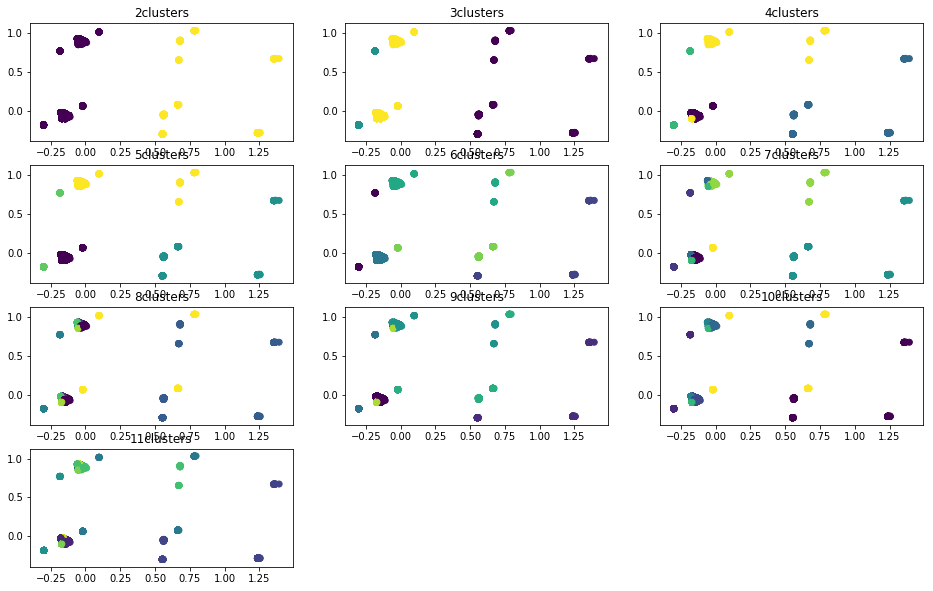

In [103]:
dflog = segmented_rfm.copy()
#dflog.recency = np.log(dflog.recency+1)
dflog.frequency = np.log(dflog.frequency+1)
dflog.monetary_value = np.log(dflog.monetary_value+1)

dflogscaled = PrepareDF(dflog, cols, categories)
clstab = GraphPCA(dflogscaled)

In [107]:
def SilhouetteGraph(p_df):
    sil = []
    nclust = range(2, 100)
    for nu in nclust:
        cls = cluster.KMeans(n_clusters=nu, n_init=1, init='random')
        cls.fit(p_df)
        si = metrics.silhouette_score(p_df, cls.labels_)
        sil.append(si)

    plt.figure(figsize=(10, 5))
    plt.plot(nclust, sil, marker='o')
    plt.xlabel("nb de clusters")
    plt.title("Coef de silhouette")

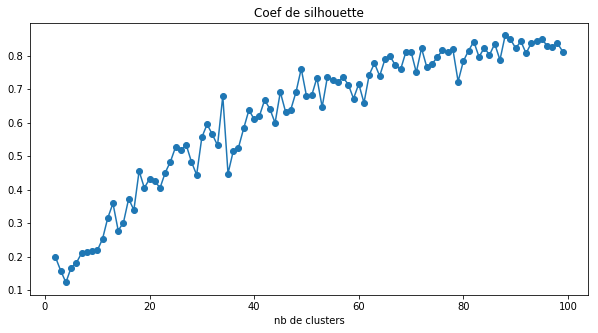

In [108]:
SilhouetteGraph(dfscaled)

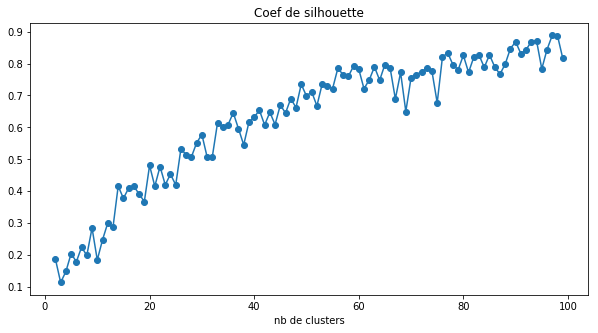

In [109]:
SilhouetteGraph(dflogscaled)

In [101]:
for i in range (1, 10):
    pca = decomposition.PCA(n_components=i)
    pca.fit(dfscaled)
    print("Explained variance ratio :", pca.explained_variance_ratio_.cumsum())


Explained variance ratio : [ 0.41407933]
Explained variance ratio : [ 0.41407933  0.75058352]
Explained variance ratio : [ 0.41407933  0.75058352  0.98691761]
Explained variance ratio : [ 0.41407933  0.75058352  0.98691761  0.99338059]
Explained variance ratio : [ 0.41407933  0.75058352  0.98691761  0.99338059  0.99670208]
Explained variance ratio : [ 0.41407933  0.75058352  0.98691761  0.99338059  0.99670208  0.9986375 ]
Explained variance ratio : [ 0.41407933  0.75058352  0.98691761  0.99338059  0.99670208  0.9986375   1.        ]


ValueError: n_components=8 must be between 0 and n_features=7 with svd_solver='full'

Etude des logs

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4372 entries, 14646.0 to 12346.0
Data columns (total 13 columns):
recency           4372 non-null float64
frequency         4372 non-null float64
monetary_value    4372 non-null float64
Cancel            4372 non-null int64
Promo             4372 non-null int64
UK                4372 non-null int64
cum_sum           4372 non-null float64
cum_perc          4372 non-null float64
Best              4372 non-null int64
r_quartile        4372 non-null int64
f_quartile        4372 non-null int64
m_quartile        4372 non-null int64
RFMScore          4372 non-null object
dtypes: float64(5), int64(7), object(1)
memory usage: 478.2+ KB


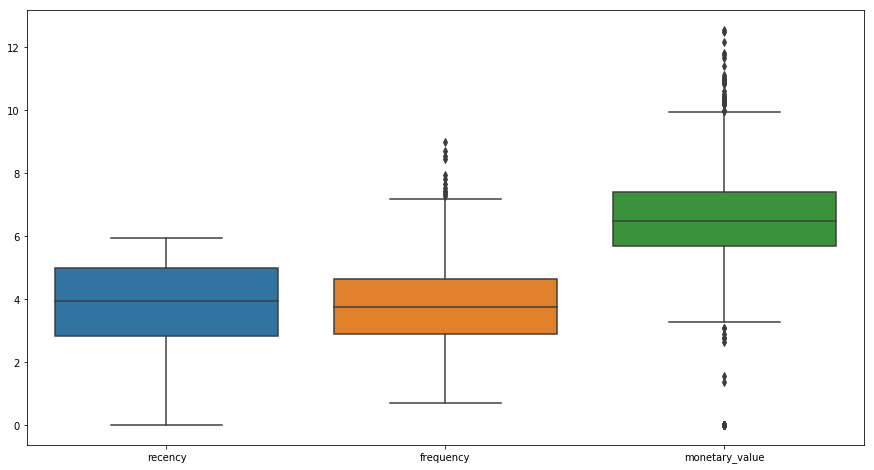

In [81]:
dflog = segmented_rfm.copy()
dflog.recency = np.log(dflog.recency+1)
dflog.frequency = np.log(dflog.frequency+1)
dflog.monetary_value = np.log(dflog.monetary_value+1)

test = dflog[['recency', 'frequency', 'monetary_value']]
fig = plt.figure(figsize=(15, 8))
sns.boxplot(data=test)
dflog.info()

Text(0.5,1,'k-means')

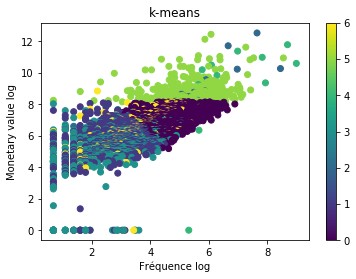

In [77]:
# Graphe avec 2 log de features et les couleurs de 6 clusters

plt.scatter(dflog.frequency, dflog.monetary_value, c=clstab[5].labels_)
plt.xlabel("Fréquence log")
plt.ylabel("Monetary value log")
plt.colorbar()
plt.title("k-means")

In [46]:
# Dataset avec série temporelle

dtTable = df[df.InvoiceDate.dt.month==8]
dtTable = dtTable[dtTable.InvoiceDate.dt.day<=20]
dtTable = dtTable.groupby('InvoiceDate').agg({'TotalPrice': lambda x: x.sum()})
#rfmTable['InvoiceDate'] = rfmTable['InvoiceDate'].astype(int)
dtTable

,TotalPrice
InvoiceDate,
2011-08-01 08:30:00,304.56
2011-08-01 09:31:00,178.50
2011-08-01 10:03:00,660.45
2011-08-01 10:08:00,211.14
2011-08-01 10:09:00,120.50
2011-08-01 10:23:00,799.62
2011-08-01 10:26:00,1089.18
2011-08-01 11:08:00,181.16
2011-08-01 11:12:00,8.29


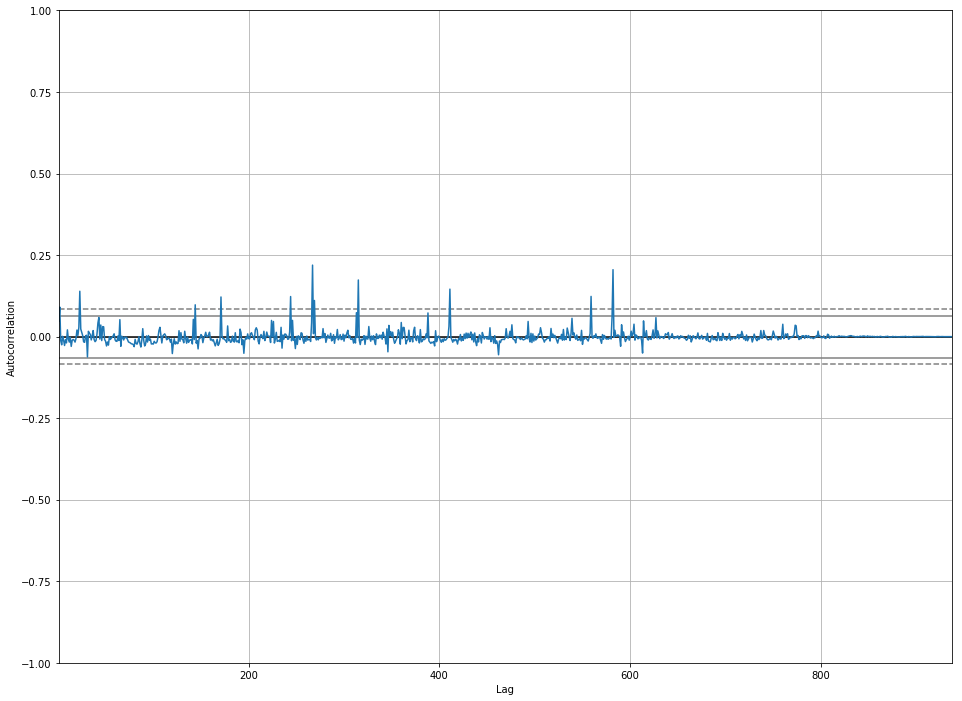

In [47]:
from pandas.plotting import autocorrelation_plot
fig = plt.figure(figsize=(16, 12))
autocorrelation_plot(dtTable)

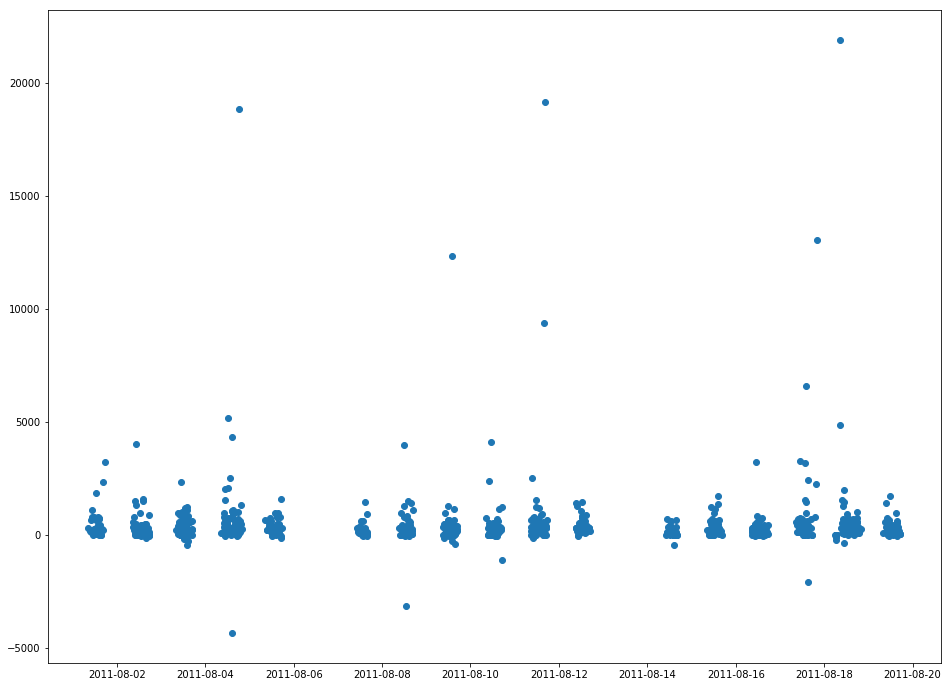

In [48]:
fig = plt.figure(figsize=(16, 12))

plt.plot_date(dtTable.index, dtTable)

## Modèle 2

In [50]:
df[df.CustomerID==17850]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel,Promo,UK,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0,0,1,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,0,1,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0,0,1,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,0,1,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,0,1,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,0,0,1,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,0,0,1,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,0,0,1,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,0,0,1,11.10
47,536372,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 09:01:00,1.85,17850.0,United Kingdom,0,0,1,11.10


In [126]:
tmp = df.copy()
tmp['InvoiceDateY'] = tmp['InvoiceDate'].dt.year
tmp['InvoiceDateM'] = tmp['InvoiceDate'].dt.month
#tmp = tmp.groupby(['CustomerID', 'InvoiceDateY', 'InvoiceDateM']).agg({'TotalPrice': lambda x: x.sum()})

tmp['InvoiceDateYM'] = tmp.apply(lambda row : (str(row['InvoiceDateY']) + '-' + str(row['InvoiceDateM'])), axis=1)
#tmp = tmp.groupby(['CustomerID', 'InvoiceDateM']).agg({'TotalPrice': lambda x: x.sum()})
tmp

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel,Promo,UK,TotalPrice,InvoiceDateY,InvoiceDateM,InvoiceDateYM
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0,0,1,15.30,2010,12,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,0,1,20.34,2010,12,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0,0,1,22.00,2010,12,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,0,1,20.34,2010,12,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,0,1,20.34,2010,12,2010-12
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,0,0,1,15.30,2010,12,2010-12
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,0,0,1,25.50,2010,12,2010-12
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,0,0,1,11.10,2010,12,2010-12
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,0,0,1,11.10,2010,12,2010-12
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,0,0,1,54.08,2010,12,2010-12


In [176]:
pd.set_option('display.max_columns', 200)
tmp2 = tmp.groupby(['CustomerID', 'InvoiceDateM', 'InvoiceDateY']).agg({'TotalPrice': lambda x: x.sum()}).unstack().unstack()
tmp2.head()

TotalPrice                                                  \
InvoiceDateY       2010                                                   
InvoiceDateM         1   2   3   4   5   6   7   8   9   10  11      12   
CustomerID                                                                
12346.0             NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN     NaN   
12347.0             NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  711.79   
12348.0             NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  892.80   
12349.0             NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN     NaN   
12350.0             NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN     NaN   

                                                                        \
InvoiceDateY    2011                                                     
InvoiceDateM      1      2   3       4   5       6   7       8      9    
CustomerID                                                               
12346.0         0.00    NaN NaN     NaN NaN     NaN NaN     NaN    NaN   
12347.0       475.39    NaN NaN  636.25 NaN  382.52 NaN  584.91    NaN   
12348.0       227.44    NaN NaN  367.00 NaN     NaN NaN     NaN  310.0   
12349.0          NaN    NaN NaN     NaN NaN     NaN NaN     NaN    NaN   
12350.0          NaN  334.4 NaN     NaN NaN     NaN NaN     NaN    NaN   

                                        
InvoiceDateY                            
InvoiceDateM       10       11      12  
CustomerID                              
12346.0           NaN      NaN     NaN  
12347.0       1294.32      NaN  224.82  
12348.0           NaN      NaN     NaN  
12349.0           NaN  1757.55     NaN  
12350.0           NaN      NaN     NaN

In [177]:
tmp2 = tmp2.iloc[:,-13:-1]
tmp2['Target'] = (tmp2.iloc[:,-1] > 0)
tmp2.head(10)

TotalPrice                                                     \
InvoiceDateY       2010    2011                                              
InvoiceDateM         12       1      2   3       4   5       6   7       8   
CustomerID                                                                   
12346.0             NaN    0.00    NaN NaN     NaN NaN     NaN NaN     NaN   
12347.0          711.79  475.39    NaN NaN  636.25 NaN  382.52 NaN  584.91   
12348.0          892.80  227.44    NaN NaN  367.00 NaN     NaN NaN     NaN   
12349.0             NaN     NaN    NaN NaN     NaN NaN     NaN NaN     NaN   
12350.0             NaN     NaN  334.4 NaN     NaN NaN     NaN NaN     NaN   

                                      Target  
InvoiceDateY                                  
InvoiceDateM      9       10       11         
CustomerID                                    
12346.0         NaN      NaN      NaN  False  
12347.0         NaN  1294.32      NaN  False  
12348.0       310.0      NaN      NaN  False  
12349.0         NaN      NaN  1757.55   True  
12350.0         NaN      NaN      NaN  False

In [181]:
tmp2 = tmp2.fillna(0)
from sklearn.model_selection import train_test_split
X = tmp2.iloc[:, :-1]
y = tmp2.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [190]:
from sklearn import dummy
# Méthode naive par la classe la plus fréquente pour comparer
dum = dummy.DummyClassifier(strategy='most_frequent')
# Entraînement
dum.fit(X_train, y_train)
# Prédiction sur le jeu de test
y_pred = dum.predict(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print (roc_auc)
# Evaluate
print ("Méthode naive : MSE = %.2f" % metrics.mean_squared_error(y_test, y_pred))

0.5
Méthode naive : MSE = 0.38


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:239: DeprecationWarning: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,


In [186]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
lr = LogisticRegression()
lr.fit(X_train,y_train)
# On récupère la prédiction de la valeur positive
y_pred = lr.predict_proba(X_test)[:,1] 
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print (roc_auc)
print ("LogisticRegression : MSE = %.2f" % metrics.mean_squared_error(y_test, y_pred))

0.997137385097
LogisticRegression : MSE = 0.01


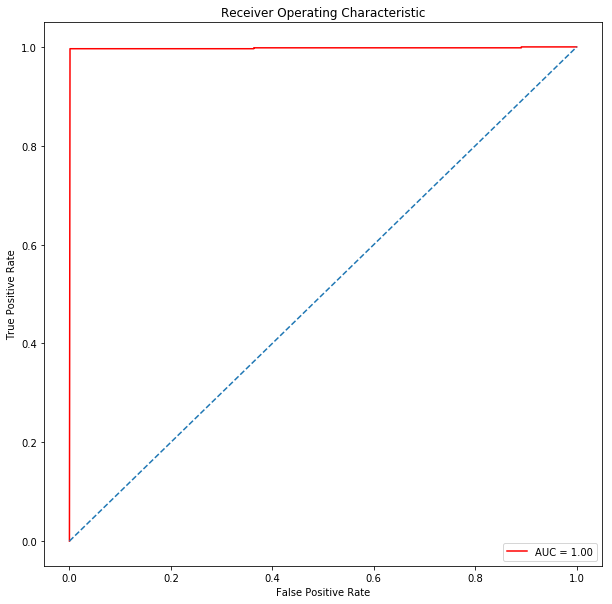

In [185]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [197]:
pd.concat(X_test, y_test)

TypeError: first argument must be an iterable of pandas objects, you passed an object of type "DataFrame"